<a href="https://colab.research.google.com/github/Yenuli0808/CM2604_Telco_Customer_Churn-CW/blob/main/notebooks/Task_02/02_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **02:Data Cleaning and Preprocessing **

2.1: Import Libraries

---



In [55]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


2.2: Load Dataset

---



In [56]:
!wget -q https://raw.githubusercontent.com/Yenuli0808/CM2604_Telco_Customer_Churn-CW/main/data/Telco-Customer-Churn.csv
df = pd.read_csv('Telco-Customer-Churn.csv')

print("✅ Dataset loaded successfully!")
print("\n=== Data set overview ===")
print(f"Dataset shape: {df.shape}")  # (rows, columns)

✅ Dataset loaded successfully!

=== Data set overview ===
Dataset shape: (7043, 21)


2.3: Initial Inspection

---



In [57]:
# First look at the data
print("==== FIRST 5 ROWS ====\n")
display(df.head())

==== FIRST 5 ROWS ====



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [58]:
print("\n==== Dataset Info ====\n")
df.info()


==== Dataset Info ====

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling 

In [59]:
print("\n===== SUMMARY STATS =====")
df.describe(include="all")


===== SUMMARY STATS =====


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [60]:
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates() if df.duplicated().sum() > 0 else df

Duplicate rows: 0


2.4: Missing Values Handling

---



In [61]:
print("\n=== MISSING VALUES ===")
print(df.isnull().sum())


=== MISSING VALUES ===
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [62]:
#Converting to numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("\nMissing Values after conversion:\n")
print(df.isna().sum())

#checking how many become NaN
df['TotalCharges'].isna().sum()


Missing Values after conversion:

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


np.int64(11)

In [63]:
# Dropping CustomerID (as it's not useful for modeling)

df = df.drop(columns=['customerID'])
print("✅ Dropped customerID! Columns now:", df.columns.tolist())
print("\n=== Updated Data set overview ===")
print(f"Dataset shape: {df.shape}")
df.head()

✅ Dropped customerID! Columns now: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

=== Updated Data set overview ===
Dataset shape: (7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [64]:
#Dropping 11 raws where total charge is NaN
print("\nDropping 11 rows with missing TotalCharges...")
df = df.dropna(subset=['TotalCharges'])
print(f"\nDataset shape(new): {df.shape}")


Dropping 11 rows with missing TotalCharges...

Dataset shape(new): (7032, 20)


**Summary: Why missing values were dropped instead of imputed**

---
* 11 missing TotalCharged values corresponded to customers with tenure =0, meaning these customers had joined the service but had not yet recieved their first bill.

* Because the billing history does not exist, imputing the values would introduce unrealistic financial information and may distort model learning.

* Removing these few records is statistically safe and maintains data integrity.


2.5: Binary Column Conversion

---



In [65]:
# 1) Finding yes/no columns
binary_cols = [col for col in df.columns
               if df[col].nunique() == 2 and
               sorted(df[col].unique().tolist()) == ['No','Yes']]

print(binary_cols)

['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


In [66]:
#2) converting them to 0/1
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1,'No': 0})

print("✅ All binary columns encoded to 0/1!")
print("\nConverted binary columns: ", binary_cols)

print("\nQuick look on Data set after conversion:\n")
df.head(10)

✅ All binary columns encoded to 0/1!

Converted binary columns:  ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

Quick look on Data set after conversion:



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
5,Female,0,0,0,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1
6,Male,0,0,1,22,1,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,Female,0,0,0,10,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,0,Mailed check,29.75,301.90,0
8,Female,0,1,0,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1
9,Male,0,0,1,62,1,No,DSL,Yes,Yes,No,No,No,No,One year,0,Bank transfer (automatic),56.15,3487.95,0


2.6: Identify Categorical and Numerical Features

---



In [67]:
categorical_cols = df.select_dtypes(include="object").columns.tolist()
numerical_cols = df.select_dtypes(include=["int64","float64"]).columns.tolist()

print("\nCategorical features:", categorical_cols)
print("\nNumerical features:", numerical_cols)



Categorical features: ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

Numerical features: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']


2.7: Outlier Analysis

---



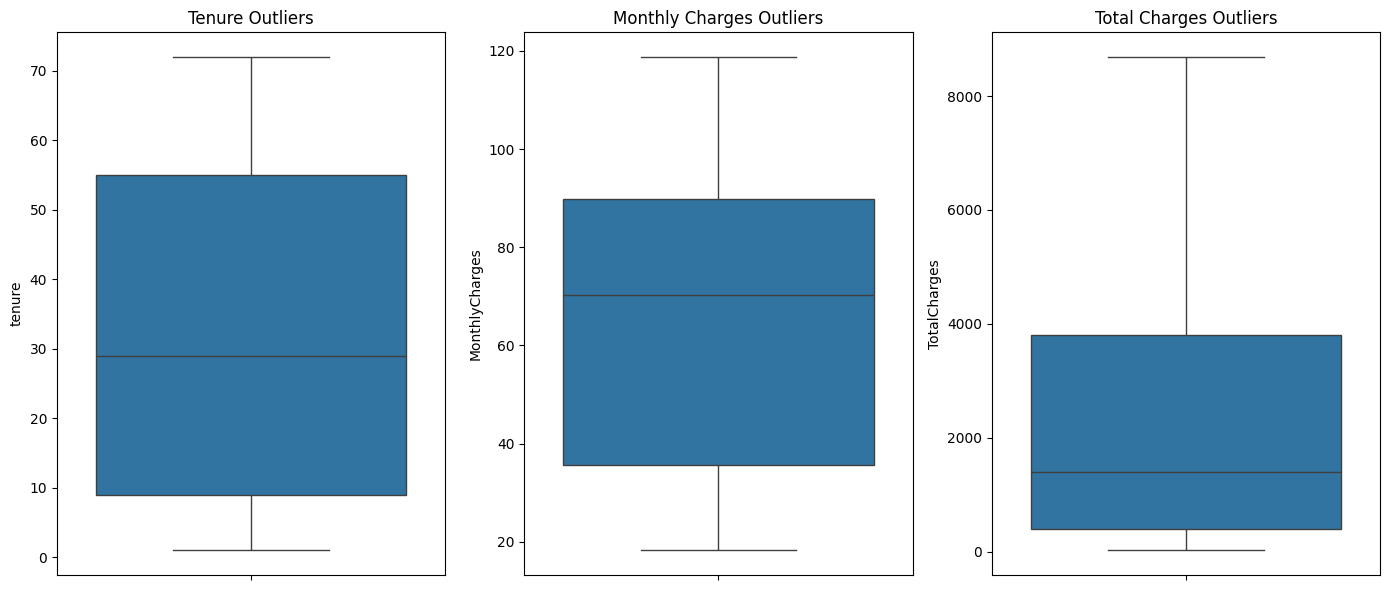

In [68]:
# Boxplots for outliers
plt.figure(figsize=(14,6))
plt.subplot(1,3,1)
sns.boxplot(y=df["tenure"])
plt.title("Tenure Outliers")

plt.subplot(1,3,2)
sns.boxplot(y=df["MonthlyCharges"])
plt.title("Monthly Charges Outliers")

plt.subplot(1,3,3)
sns.boxplot(y=df["TotalCharges"])
plt.title("Total Charges Outliers")

plt.tight_layout()
plt.show()


# Outlier Decision

---
* The variables tenure, MonthlyCharges, and TotalCharges naturally contains extreme values due to the billing structure of the telecommunication industry.

* These extreme represent genuine customer behaviour rather than errors.

* Removing them would reduce model generalisability and distort finacial patterns.

* Therefore, all outliers were retained because they reflect meaningful customer differences.


2.8: Feature Engineering

---



In [69]:
print("===== Feature Enginnering =====")

#1. Tenure Groups
bins = [0,12,24,48,60,72]
labels = ["0-12","13-24","25-48","49-60","61-72"]
df["TenureGroup"] = pd.cut(df["tenure"], bins=bins, labels=labels, include_lowest=True)
print("\n✅Tenure groups created!")

## 2. Monthly Charge Groups
df["MonthlyChargeGroup"] = pd.cut(df["MonthlyCharges"],
                                  bins=[0,35,70,100,200],
                                  labels=["Low","Medium","High","Very High"])
print("\n✅Monthly charge groups created!")

# 3. Charges Ratio
df["ChargesRatio"] = df["TotalCharges"] / (df["MonthlyCharges"] + 1)
print("\n✅Charges ratio created!")

# 4. Service Count
service_cols = [
    "OnlineSecurity","OnlineBackup","DeviceProtection",
    "TechSupport","StreamingTV","StreamingMovies"
]

df["ServiceCount"] = df[service_cols].apply(lambda x: (x=="Yes").sum(), axis=1)
print("\n✅Service count created!")

print("\n✅Feature engineering completed Successfully!")
print(f"\nDataset new shape: {df.shape}\n")
df.head()

===== Feature Enginnering =====

✅Tenure groups created!

✅Monthly charge groups created!

✅Charges ratio created!

✅Service count created!

✅Feature engineering completed Successfully!

Dataset new shape: (7032, 24)



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,MonthlyChargeGroup,ChargesRatio,ServiceCount
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,...,Month-to-month,1,Electronic check,29.85,29.85,0,0-12,Low,0.967585,1
1,Male,0,0,0,34,1,No,DSL,Yes,No,...,One year,0,Mailed check,56.95,1889.50,0,25-48,Medium,32.605695,2
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,...,Month-to-month,1,Mailed check,53.85,108.15,1,0-12,Medium,1.971741,2
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,...,One year,0,Bank transfer (automatic),42.30,1840.75,0,25-48,Medium,42.511547,3
4,Female,0,0,0,2,1,No,Fiber optic,No,No,...,Month-to-month,1,Electronic check,70.70,151.65,1,0-12,High,2.115063,0


2.9: Final Cleaning Summary

---



In [70]:
print("\n=== MISSING VALUES ===")
print(df.isnull().sum())


=== MISSING VALUES ===
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          0
Churn                 0
TenureGroup           0
MonthlyChargeGroup    0
ChargesRatio          0
ServiceCount          0
dtype: int64


In [71]:
print("\n===== FINAL CLEANING SUMMARY =====")

print("Final dataset shape:", df.shape)

print("\nCategorical features:", categorical_cols)
print("\nNumerical features:", numerical_cols)

print("\nClass distribution:\n")
print(df["Churn"].value_counts())
print(df["Churn"].value_counts(normalize=True)*100)



===== FINAL CLEANING SUMMARY =====
Final dataset shape: (7032, 24)

Categorical features: ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

Numerical features: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']

Class distribution:

Churn
0    5163
1    1869
Name: count, dtype: int64
Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


In [72]:
# Saving Clean DataSet

cleaned_file = 'Cleaned_Telco_Customer_Churn.csv'
df.to_csv(cleaned_file, index=False)
print("✅ Cleaned dataset saved successfully as", cleaned_file,"!")


✅ Cleaned dataset saved successfully as Cleaned_Telco_Customer_Churn.csv !


# Cleaning Summary

*   The raw dataset contained 7043 customer entries and 21 features. During preprocessing, the TotalCharges variable was identified to contain 11 non-numeric values which were converted to NaN and subsequently removed, resulting in a final dataset of 7032 valid entries.

* Checked duplicated none shown in data set and visualize outliers none need to be removed.

*   Removed Customer ID as it's not usefull for prediction

*   The target variable Churn was encoded into binary format (No = 0, Yes = 1).
In addition, all dichotomous Yes/No service-related attributes were converted to binary numeric values to support machine learning algorithms.

*   Converted yes/no columns(binary
 columns) to binary for model compatibility

*   A final validation step confirmed that the cleaned dataset contains no missing values.

*   The cleaned dataset was exported for use in modeling.
  


